## Spring 2023 : CS5720
### Neural Networks & Deep Learning ICP_5 : Jahnavi Chadalavada (700728443)

## 1. Implement Naïve Bayes method using scikit-learn library 

#### Use dataset available with name glass

In [1]:
import pandas as pd
dataset = pd.read_csv("glass.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### Use train_test_split to create training and testing part 

In [2]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("Type",axis=1)
target = dataset["Type"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.30,random_state=0)

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(149, 9) (65, 9)
(149,) (65,)


#### check if dataset follows normal/Gaussian distribution

In [3]:
from pingouin import multivariate_normality

multivariate_normality(predictors, alpha=.05)

HZResults(hz=6.912633667328901, pval=0.0, normal=False)

#### since dataset does not follow normal distribution we can normalize the data

In [4]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [5]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_norm,Y_train)

Y_pred_nb = nb.predict(X_test_norm)

Y_pred_nb.shape

(65,)

#### Evaluate the model on test part using score and classification_report(y_true, y_pred)

In [6]:
from sklearn.metrics import accuracy_score

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 46.15 %


## 2. Implement linear SVM method using scikit library 
#### Use the same dataset above
#### Use train_test_split to create training and testing part 

#### SVM Model

In [7]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train_norm,Y_train)

Y_pred_svm = sv.predict(X_test_norm)

Y_pred_svm.shape

(65,)

#### Evaluate the model on test part using score and classification_report(y_true, y_pred)

In [8]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 58.46 %


### Which algorithm you got better accuracy? Can you justify why?

<AxesSubplot: xlabel='Algorithms', ylabel='Accuracy score'>

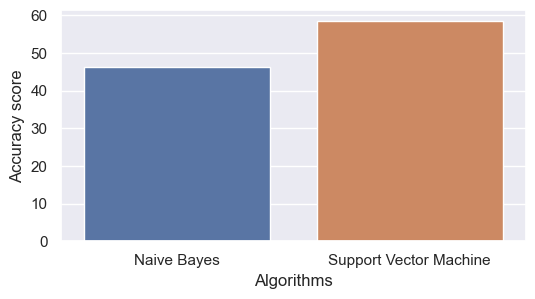

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(6,3)})
scores = [score_nb,score_svm]
algorithms = ["Naive Bayes","Support Vector Machine"]    


plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

## Support Vector Machine is giving better accuracy.
## For this particular dataset navies bayes is having low accuray.It may be due to Naive Bayes classifier assumes that the presence of a particular feature in aclass is unrelated to the presence of any other feature.